__Findings and learnings from the book:__
# Natural Language Processing and Computational Linguistics# 
A practical guide to text analysis with Python, Gensim, spaCy, and Keras

Bhargav Srinivasa-Desikan


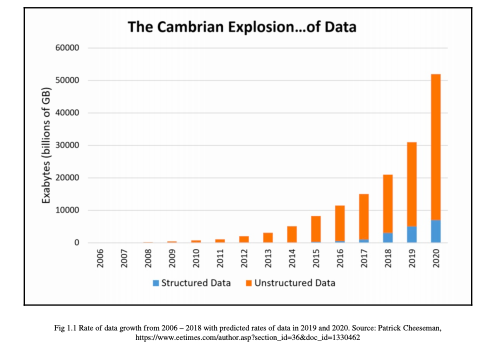

# Manipulating strings
__string methods in python__


Sources:

Strings, Bytes, and Unicode in Python 2 and 3: https://timothybramlett.com/Strings_Bytes_and_Unicode_in_Python_2_and_3.html

In [1]:
# assing a variable with an arbitrary string
s = 'computational linguistics'

In [3]:
s.count('a')

2

In [5]:
s.find('a')

6

In [6]:
s.lower()

'computational linguistics'

In [7]:
s.title()

'Computational Linguistics'

In [8]:
s.capitalize()

'Computational linguistics'

In [9]:
s.swapcase()

'COMPUTATIONAL LINGUISTICS'

In [10]:
s.isalnum()

False

In [11]:
s.isalpha()

False

In [12]:
s.isascii()

True

In [13]:
s.casefold()

'computational linguistics'

In [14]:
s.islower()

True

In [15]:
s.startswith('c')

True

In [16]:
s.endswith('a')

False

# Named entity recognition

Spacy build-in entity types:

* PERSON: People, including fictional ones
* NORP: Nationalities or religious or political groups
* FACILITY: Buildings, airports, highways, bridges, and so on
* ORG: Companies, agencies, institutions, and so on
* GPE: Countries, cities, and states
* LOC: Non GPE locations, mountain ranges, and bodies of water
* PRODUCT: Objects, vehicles, foods, and so on (not services)
* EVENT: Named hurricanes, battles, wars, sports events, and so on
* WORK_OF_ART: Titles of books, songs, and so on
* LAW: Named documents made into laws
* LANGUAGE: Any named language

In [36]:
import spacy

In [37]:
# import spacy small English model
nlp = spacy.load('en_core_web_sm')

In [38]:
s = 'I work for Microsoft in the Portuguese text regognition project.'

In [39]:
doc = nlp(s)

In [40]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Microsoft ORG
Portuguese NORP


# Rule-based matching

* ORTH: The exact verbatim text of a token
* LOWER, UPPER: The lowercase and uppercase form of the token
* IS_ALPHA: Token text consists of alphanumeric chars
* IS_ASCII: Token text consists of ASCII characters
* IS_DIGIT: Token text consists of digits
* IS_LOWER, IS_UPPER, IS_TITLE: Token text is in lowercase, uppercase, and title
* IS_PUNCT, IS_SPACE, IS_STOP: Token is punctuation, whitespace, and a stopword
* LIKE_NUM, LIKE_URL, LIKE_EMAIL: Token text resembles a number, URL, and email
* POS, TAG: The token's simple and extended POS tag
* DEP, LEMMA, SHAPE: The token's dependency label, lemma, and shape

In [45]:
my_stop_words = ['say', 'be', 'said', 'says', 'saying', 'field']

# METHOD 1
# add stop words to the vocab
# for stopwords in my_stop_words:
#     lexeme = nlp.vocab([stopwords])
#     lexeme.is_stop = True

# METHOD 2
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

# add words using this command
# STOP_WORDS.add('word')

{'four', 'last', 'further', 'third', 'name', 're', 'him', 'thru', 'seems', 'will', 'therefore', 'from', 'around', 'could', 'give', 'do', 'toward', 'empty', 'themselves', 'really', 'yet', '’ll', 'namely', 'your', '‘s', 'one', 'itself', 'mostly', 'here', 'still', 'across', "'ll", 'always', 'thereafter', 'twenty', 'ourselves', 'below', 'since', 'amongst', 'my', 'used', 'per', 'are', 'full', 'several', 'thereby', 'before', 'except', 'while', 'just', 'less', 'beyond', 'without', 'for', 'anyone', 'others', 'well', 'is', 'n’t', 'if', 'no', 'there', 'often', 'throughout', "'d", 'myself', 'cannot', 'may', 'noone', 'therein', 'to', 'might', 'our', 'never', 'nowhere', 'again', 'whom', 'be', 'any', 'became', 'moreover', 'whereafter', '’m', 'hence', 'rather', 'i', 'where', 'been', 'sometime', 'they', 'whose', 'her', 'first', 'latter', 'under', 'forty', 'once', 'regarding', 'or', 'towards', 'made', 'he', 'bottom', 'hundred', 'otherwise', 'beside', 'both', 'take', 'formerly', 'everywhere', 'either', 

# Vectorizing

Methods:
* BoW (bag of words)
* TF-IDF (term frequency-inverse document frequency)
* LSI (latent semantic indexing)
* LDA (Latent Dirichlet allocation)
* Word2Vec
* Doc2Vec

## Bag of words

In [232]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [233]:
s1 = "The dog sat by the mat."
s2 = "The cat loves the dog."

l = [s1, s2]
print(s1)
print(s2)

The dog sat by the mat.
The cat loves the dog.


In [264]:
def create_vocab(list_of_string):
    
    # transform the strings into a nlp object
    vect = [nlp(string) for string in list_of_string]
    
    # creates a vocabulary
    vocab = []

    x = 0
    while x <= len(l)-1:
        for word in vect[x]:
            if word.is_stop==False and word.is_alpha==True:
                vocab.append(word)
        x+=1
    return vocab

In [265]:
# create vocab
vocab = create_vocab(l)

In [281]:
# create list of cleaned words

vect = [nlp(string) for string in l]

s1_words = []
s2_words = []

# extract words from the s1 string
for w in vect[0]:
    if w.is_stop==False and w.is_alpha==True:
        s1_words.append(w)

# extract words from the s2 string
for w in vect[1]:
    if w.is_stop==False and w.is_alpha==True:
        s2_words.append(w)
        
print(s1_words)
print(s2_words)

# list of cleaned words
l_codes = [s1_words, s2_words]

array = np.array([s1_words, s2_words])

[dog, sat, mat]
[cat, loves, dog]


In [282]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
ohe = OneHotEncoder()

ohe.fit_transform(array).toarray()

array([[0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0.]])

In [288]:
def encode_bow(array, list_of_string):
    vocab = create_vocab(list_of_string)
    
    code = []
    
    for i in vocab:
        print(i)
        if i in array:
            code.append(1)
        else:
            code.append(0)
    
    return code

In [299]:
s1_code = []

for i in vocab:
    if i in s1_words:
        s1_code.append(1)
    else:
        s1_code.append(0)
        
s2_code = []

for i in vocab:
    if i in s2_words:
        s2_code.append(1)
    else:
        s2_code.append(0)
        
array_code = np.array([s1_code, s2_code])

In [300]:
array

array([[dog, sat, mat],
       [cat, loves, dog]], dtype=object)

In [301]:
vocab

[dog, sat, mat, cat, loves, dog]

In [302]:
s1_words

[dog, sat, mat]